In [5]:
#1. Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
sns.set(style="whitegrid")
plt.style.use("ggplot")
%matplotlib inline

In [7]:
#2. Load the Cleaned Data

X_train = pd.read_csv("../X_train_cleaned.csv")
y_train = pd.read_csv("../y_train_cleaned.csv")

# Merge for convenience
train_df = pd.concat([X_train, y_train], axis=1)

In [62]:
print(train_df.shape)
print(train_df.columns)
train_df.head()

(103904, 28)
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction'],
      dtype='object')


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,False,True,True,False,False,True,False,False,True,0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,False,True,False,True,True,False,True,False,False,0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,True,False,True,False,True,False,True,False,False,1
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,True,False,True,False,True,False,True,False,False,0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,False,True,True,False,True,False,True,False,False,1


In [64]:
# 4. Define a Utility Function for Annotated Count Plots

def plot_count(series, title):
    ax = sns.countplot(x=series)
    plt.title(title)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 10))
    plt.show()

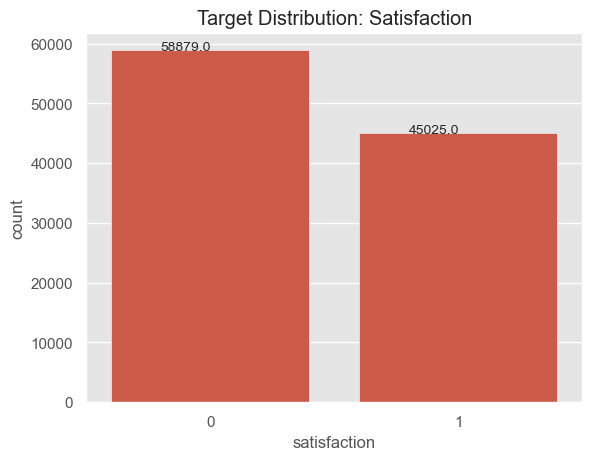

In [66]:
## A. Distribution of Target Variable (satisfaction)
plot_count(train_df['satisfaction'], "Target Distribution: Satisfaction")

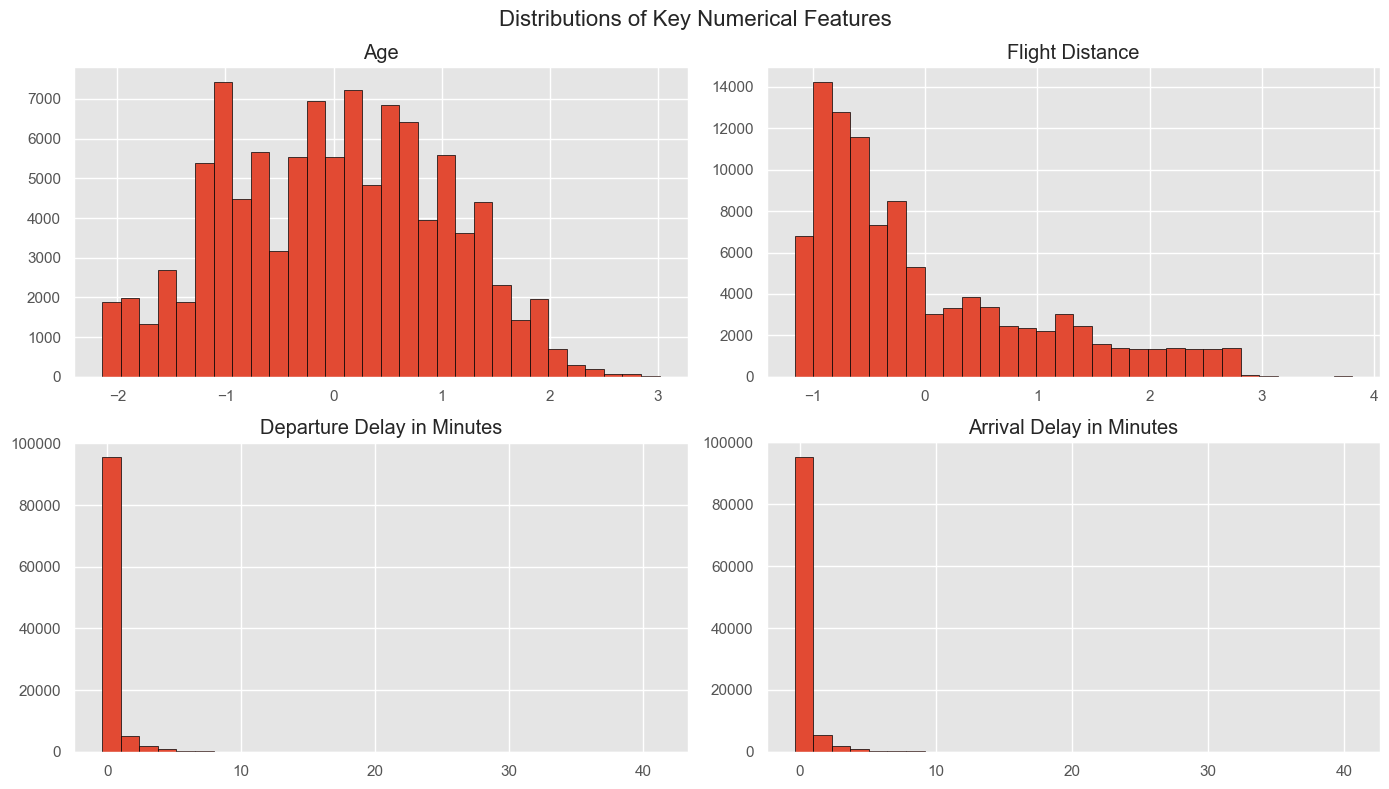

In [68]:
## B. Distributions of Key Features
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_df[numeric_cols].hist(bins=30, figsize=(14, 8), edgecolor='black')
plt.suptitle('Distributions of Key Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

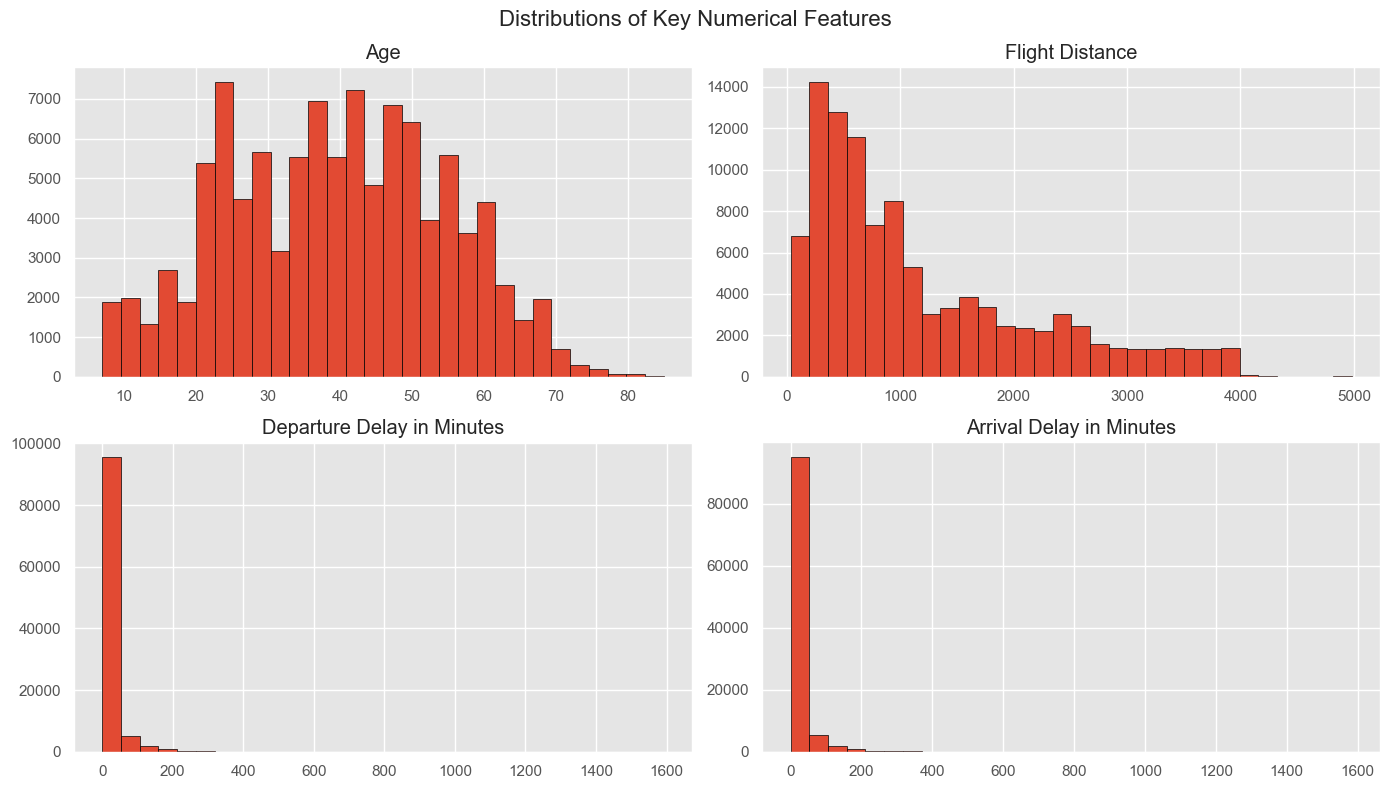

In [70]:
# for unscaled data
train_unscaled = pd.read_csv("../train.csv")
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_unscaled[numeric_cols].hist(bins=30, figsize=(14, 8), edgecolor='black')
plt.suptitle('Distributions of Key Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

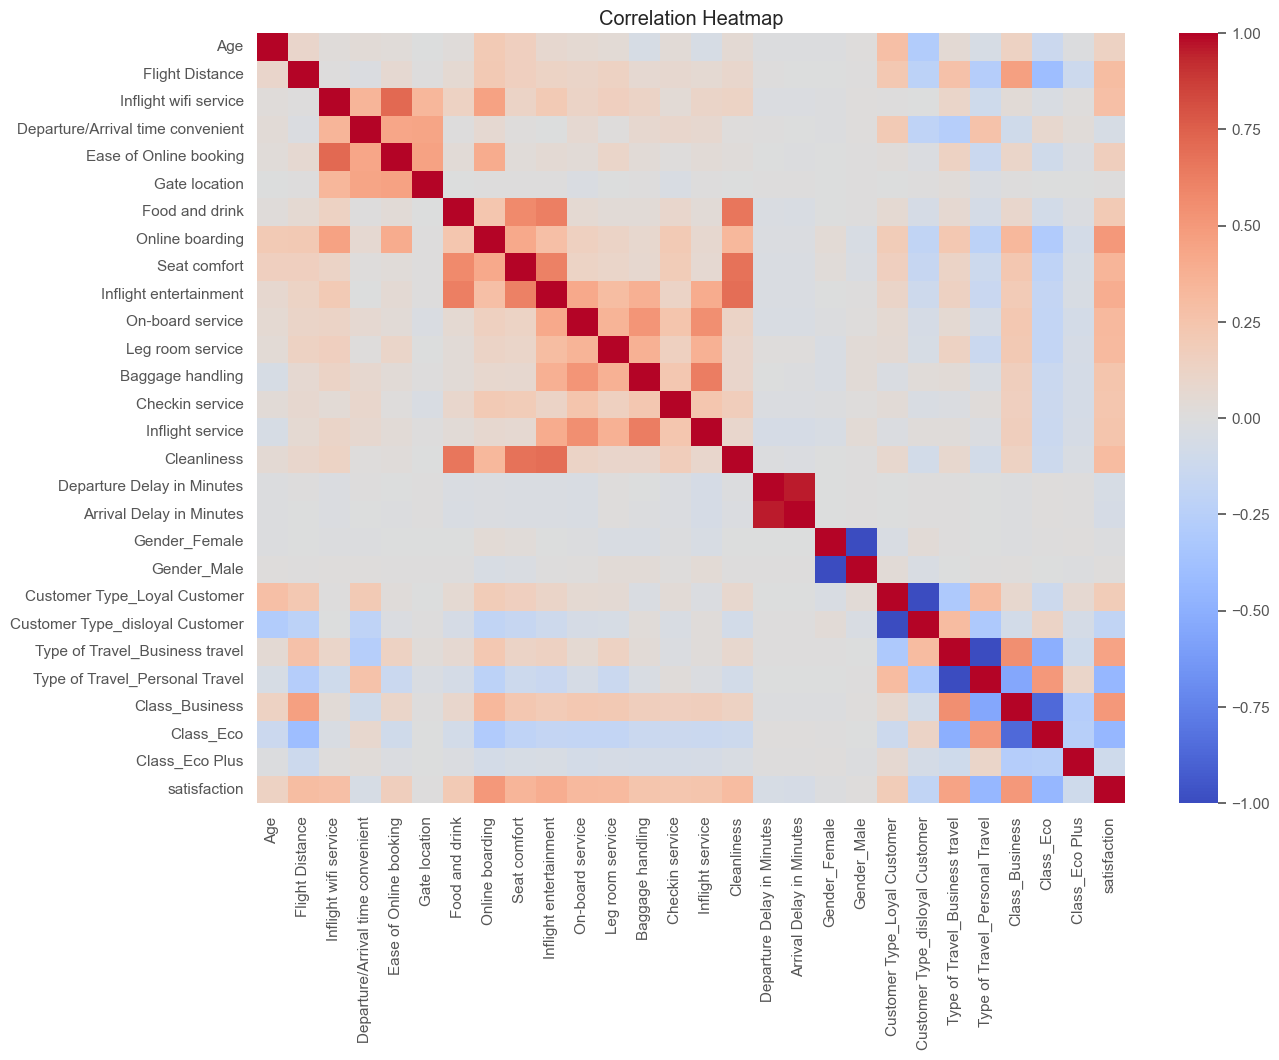

In [72]:
## C. Correlation Heatmap

plt.figure(figsize=(14, 10))
corr = train_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
# Save the heatmap
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [74]:
#Focus on target correlations:
print("Correlation with satisfaction:")
print(corr['satisfaction'].sort_values(ascending=False))

Correlation with satisfaction:
satisfaction                         1.000000
Class_Business                       0.503848
Online boarding                      0.503557
Type of Travel_Business travel       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type_Loyal Customer         0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Gender_Male                          0.012211
Gate location                        0.000682
Gender_Female                       -0.012211
Dep

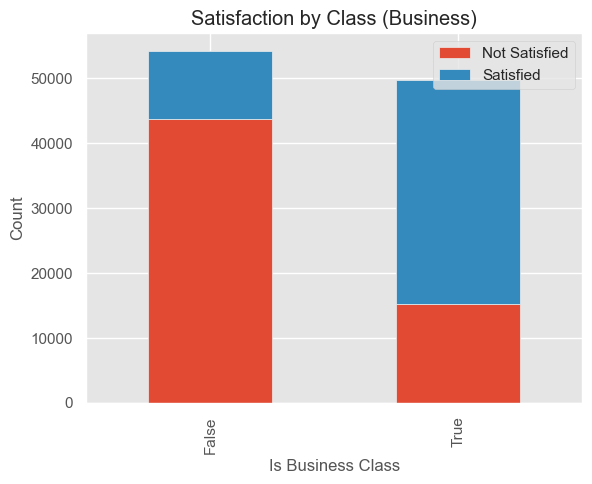

In [76]:
## D. Categorical Feature vs. Target

# Stacked bar plot of satisfaction by Class

class_satisfaction = pd.crosstab(train_df['Class_Business'], train_df['satisfaction'])
class_satisfaction.plot(kind='bar', stacked=True)
plt.title('Satisfaction by Class (Business)')
plt.xlabel('Is Business Class')
plt.ylabel('Count')
plt.legend(['Not Satisfied', 'Satisfied'])
plt.show()

In [78]:
# Average satisfaction by Gender
gender_cols = ['Gender_Female', 'Gender_Male']
for col in gender_cols:
    print(f"{col} avg satisfaction:", train_df.groupby(col)['satisfaction'].mean())

Gender_Female avg satisfaction: Gender_Female
False    0.439475
True     0.427371
Name: satisfaction, dtype: float64
Gender_Male avg satisfaction: Gender_Male
False    0.427371
True     0.439475
Name: satisfaction, dtype: float64


In [80]:
# Average satisfaction by Class
gender_cols = ['Class_Business', 'Class_Eco', 'Class_Eco Plus']
for col in gender_cols:
    print(f"{col} avg satisfaction:", train_df.groupby(col)['satisfaction'].mean())

Class_Business avg satisfaction: Class_Business
False    0.194417
True     0.694251
Name: satisfaction, dtype: float64
Class_Eco avg satisfaction: Class_Eco
False    0.635490
True     0.186138
Name: satisfaction, dtype: float64
Class_Eco Plus avg satisfaction: Class_Eco Plus
False    0.447889
True     0.246064
Name: satisfaction, dtype: float64


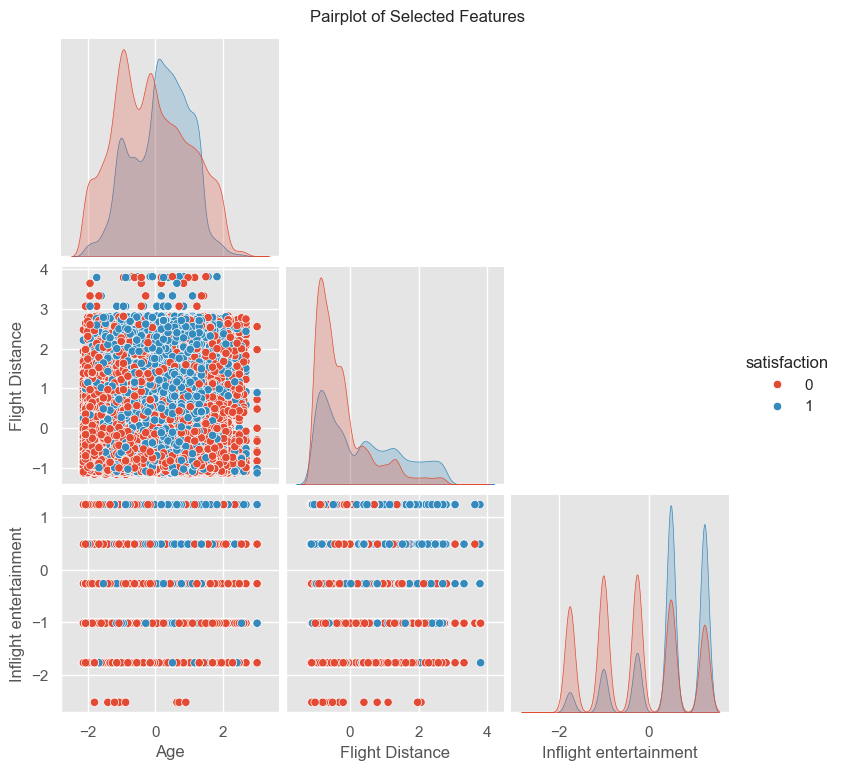

In [82]:
##  E. Multivariate Relationships

subset = train_df[['satisfaction', 'Age', 'Flight Distance', 'Inflight entertainment']]
sns.pairplot(subset, hue='satisfaction', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("Pairplot of Selected Features.png", dpi=300, bbox_inches='tight')
plt.show()

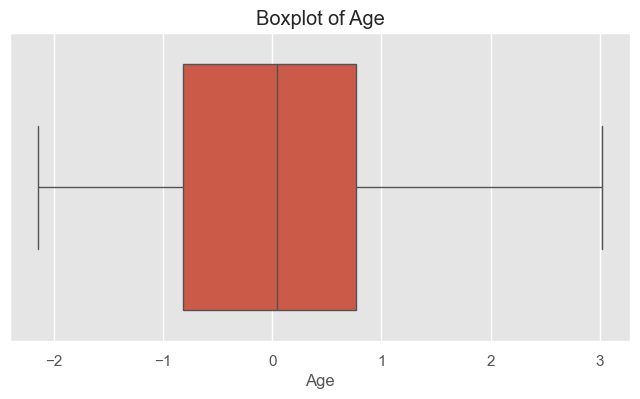

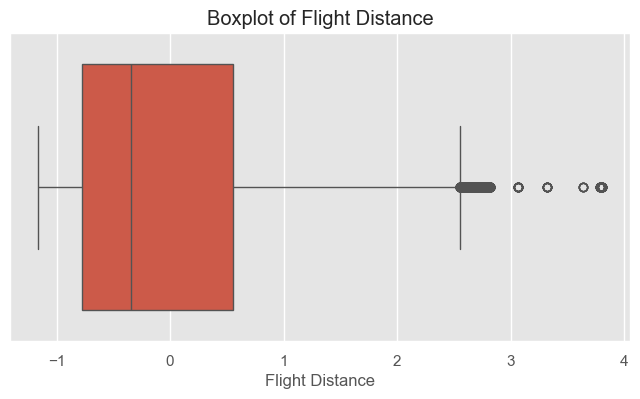

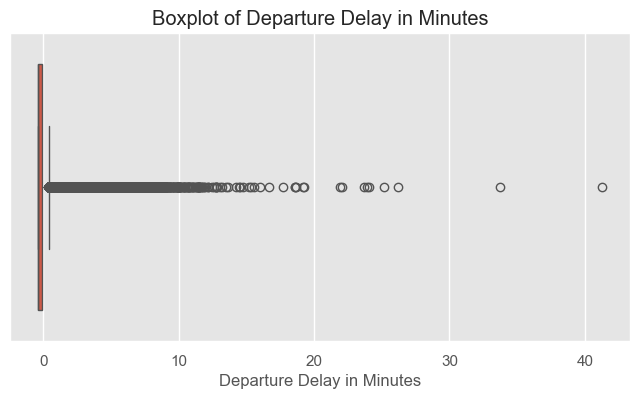

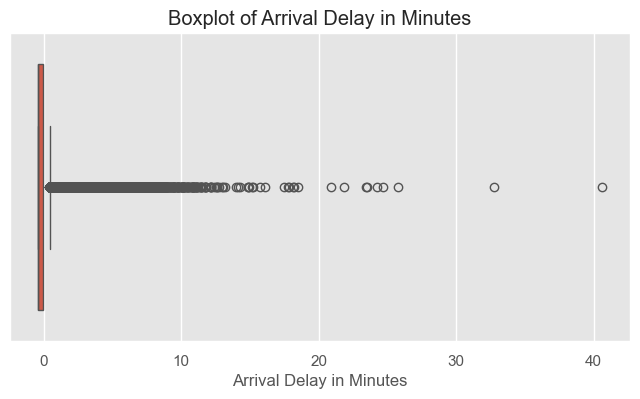

In [83]:
## F. Outlier Detection

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
### Feature Engineering  ###
## Step A: New Feature Creation
#  1. Total Service Score
# Sum of all service-related ratings

service_features = [
    'Inflight wifi service',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

X_test = pd.read_csv("../X_test_cleaned.csv")
y_test = pd.read_csv("../y_test_cleaned.csv")

# Merge for convenience
test_df = pd.concat([X_test, y_test], axis=1)

train_df['Total Service Score'] = train_df[service_features].sum(axis=1)
test_df['Total Service Score'] = train_df[service_features].sum(axis=1)

# Captures overall customer service perception
# Helps differentiate satisfied from dissatisfied passengers

In [11]:
# 2. Delay Ratio
# Ratio of total delay to flight distance

train_df['Delay Ratio'] = (
    train_df['Departure Delay in Minutes'] + train_df['Arrival Delay in Minutes']
) / (train_df['Flight Distance'] + 1) #+1 avoids division by zero


test_df['Delay Ratio'] = (
    test_df['Departure Delay in Minutes'] + train_df['Arrival Delay in Minutes']
) / (test_df['Flight Distance'] + 1) #+1 avoids division by zero

# Helps detect perceived efficiency
# Adjusts delay severity by trip length

In [13]:
# 3. Had Delay (Binary)
# Whether the passenger experienced any delay

train_df['Had Delay'] = (
    (train_df['Departure Delay in Minutes'] > 0) |
    (train_df['Arrival Delay in Minutes'] > 0)
).astype(int)


test_df['Had Delay'] = (
    (test_df['Departure Delay in Minutes'] > 0) |
    (test_df['Arrival Delay in Minutes'] > 0)
).astype(int)

# Creates a clear binary flag
# Easy for models to learn from

In [15]:
# 5. Service Rating Variance
# Standard deviation across all service scores

train_df['Service Rating Variance'] = train_df[service_features].std(axis=1)
test_df['Service Rating Variance'] = test_df[service_features].std(axis=1)

In [19]:
# to use in front-end

import joblib

service_features = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service", 
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"
]

joblib.dump(service_features, "../models/service_features.pkl")
print("Saved service_features.pkl")

Saved service_features.pkl


In [21]:
# saving before PCA (Full Feature Set) — for Supervised Learning
train_df.to_csv("../data/train_full_features.csv", index=False)
test_df.to_csv("../data/test_full_features.csv", index=False)

In [23]:
## Step B: Dimensionality Reduction for Clustering or Visualization
# Use PCA to project features into 2D (especially useful later for clustering and Reduce dimensionality before unsupervised modeling)

from sklearn.decomposition import PCA
import joblib

service_features = [
    "Inflight wifi service",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service"
]

# Recreate and fit PCA on training set
pca = PCA(n_components=2)
pca_features = pca.fit_transform(train_df[service_features])

# Save the transformer for test usage
joblib.dump(pca, "../models/pca_transformer.pkl")

# Save PCA features for training
train_df['PCA1'] = pca_features[:, 0]
train_df['PCA2'] = pca_features[:, 1]
train_df[['PCA1', 'PCA2', 'satisfaction']].to_csv("../data/train_pca_features.csv", index=False)

# Recreate and fit PCA on test set
pca = PCA(n_components=2)
pca_features = pca.fit_transform(test_df[service_features])

# Save the transformer for test usage
joblib.dump(pca, "../models/pca_transformer.pkl")

# Save PCA features for training
test_df['PCA1'] = pca_features[:, 0]
test_df['PCA2'] = pca_features[:, 1]
test_df[['PCA1', 'PCA2', 'satisfaction']].to_csv("../data/test_pca_features.csv", index=False)

In [25]:
# Regenerate the Cleaned Datasets — But This Time with Engineered Features (and without satisfaction in X)

# Load your full datasets 
df_train = pd.read_csv("../data/train_full_features.csv")
df_test = pd.read_csv("../data/test_full_features.csv")

# Split into X and y (leak-free):
X_train = df_train.drop(columns=["satisfaction"])
y_train = df_train["satisfaction"]

X_test = df_test.drop(columns=["satisfaction"])
y_test = df_test["satisfaction"]

# (Re)Save the corrected versions:
X_train.to_csv("../data/X_train_cleaned.csv", index=False)
X_test.to_csv("../data/X_test_cleaned.csv", index=False)
y_train.to_csv("../data/y_train_cleaned.csv", index=False)
y_test.to_csv("../data/y_test_cleaned.csv", index=False)

In [27]:
# to use in front-end

from sklearn.decomposition import PCA
import joblib

# Load the service features list
service_features = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service", 
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"
]

# Refit PCA on those features from train_df
pca = PCA(n_components=2)
pca.fit(train_df[service_features])

# Save the trained PCA transformer
joblib.dump(pca, "../models/pca_transformer.pkl")
print("Saved pca_transformer.pkl")

Saved pca_transformer.pkl
